In [1]:
import importlib
import ImperialMatch.matching as im
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [53]:


importlib.reload(im)




<module 'ImperialMatch.matching' from '/Users/renesimg/Desktop/dissertation/ImperialMatch/ImperialMatch/matching.py'>

Successful pandas upload
✔ Valid data, proceed with optimization


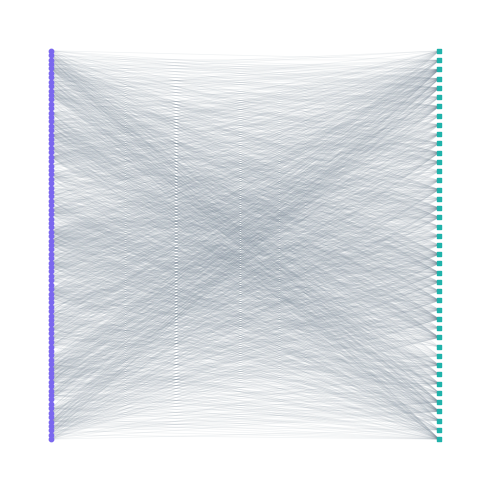

0.45126731120982494


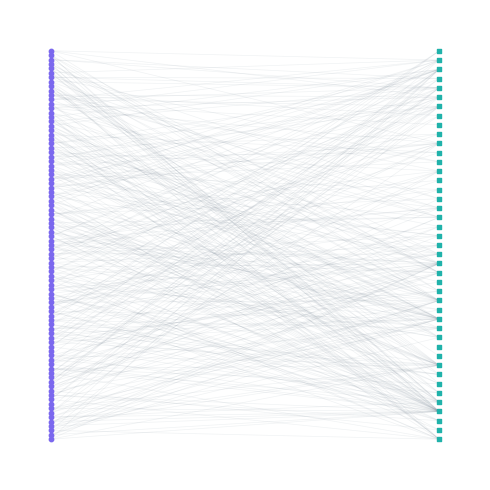

0.09067154429056702


In [5]:
## Import data and declare base natrices
ruta = "Assignment_2024_data.xlsx"
topics, modules, professors, students, cap, s_stream, p_stream = im.upload_validation(ruta)
S_block = im.incompabilities(students["Disliked"],professors["topics"], threshold = 0)
P = im.prof_relation(professors["topics"], 15)

# Base matrices
A0 = im.preference_matrix(students["Preferred"], professors["topics"], 4, 15, method = "angle") ## this should become preferences 1 at the end of this block 
A1 = im.drop_blocks(A0, S_block)
A2 = im.top_affinities(A0, 4)


print(im.plot_density(A1))
print(im.plot_density(A2))

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
True
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
True


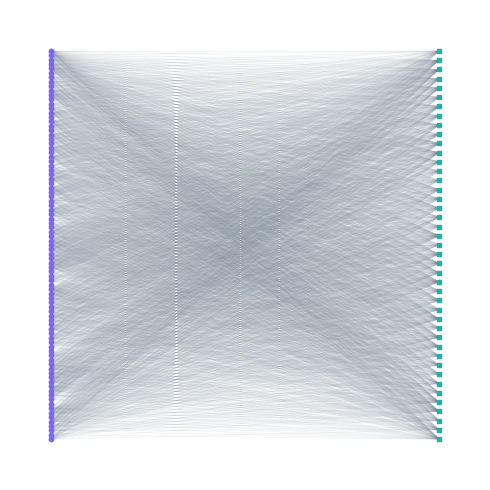

0.6626600470342304


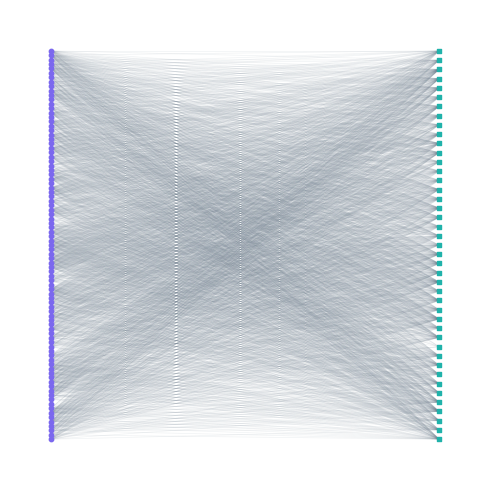

0.60308335510844


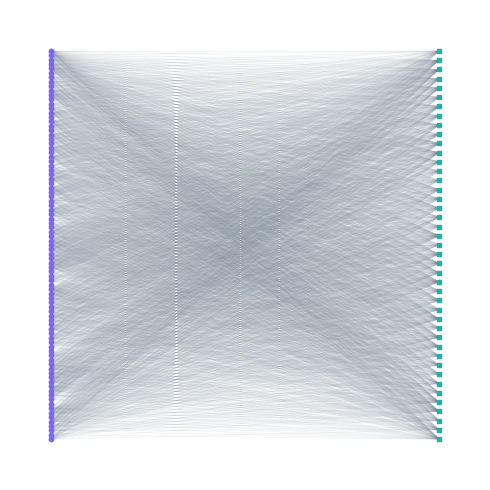

0.6626600470342304


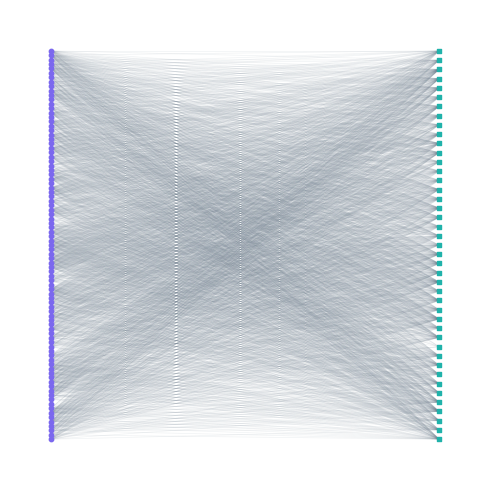

0.60308335510844


In [21]:
## recommmendation models


A1_1,U1,V1 = im.recommendation_affinities(A1, k = 15, w0 = 0)
A1_1 = im.drop_blocks(A1_1, S_block)
A2_1,U2,V2 = im.recommendation_affinities(A2, k = 15, w0 = 0)
A2_1 = im.drop_blocks(A2_1, S_block)

A1_2 = im.recommendation_profs(A1,P)
A1_2 = im.drop_blocks(A1_2, S_block)
A2_2 = im.recommendation_profs(A2,P)
A2_2 = im.drop_blocks(A2_2, S_block)

print(im.plot_density(A1_1))
print(im.plot_density(A2_2))
print(im.plot_density(A1_1))
print(im.plot_density(A2_2))

In [ ]:

print("Correls over observed\n")
print("Cosine model correlations", im.affinity_correl_obs(A1, A1_1), im.affinity_correl_obs(A1, A1_2), im.affinity_correl_obs(A1_2, A1_1))
print("top affinity correlations", im.affinity_correl_obs(A2, A2_1), im.affinity_correl_obs(A2, A2_2), im.affinity_correl_obs(A2_2, A2_1))

print("\nCorrels over all\n")
print("Cosine model correlations", im.affinity_correl(A1, A1_1), im.affinity_correl(A1, A1_2), im.affinity_correl(A1_2, A1_1))
print("top affinity correlations", im.affinity_correl(A2, A2_1), im.affinity_correl(A2, A2_2), im.affinity_correl(A2_2, A2_1))



Correls over observed

Cosine model correlations 0.9993462316811845 0.6696597771679191 0.6692903869556793
top affinity correlations 0.9998336836587213 0.7679617845264978 0.6279991618741436

Correls over all

Cosine model correlations 0.880474002392469 0.7787669497233659 0.8823008309499645
top affinity correlations 0.4040037773732414 0.5519961077164044 0.8338208028179231


In [37]:
## generating all models, this will solve even with streams

spa_10,_ = im.spa_sym(im.enhance_matrix(A1  , students["stream"],professors["stream"]),cap, followup = False)
spa_11,_ = im.spa_sym(im.enhance_matrix(A1_1, students["stream"],professors["stream"]),cap, followup = False)
spa_12,_ = im.spa_sym(im.enhance_matrix(A1_2, students["stream"],professors["stream"]),cap, followup = False)
spa_20,_ = im.spa_sym(im.enhance_matrix(A2  , students["stream"],professors["stream"]),cap, followup = False)
spa_21,_ = im.spa_sym(im.enhance_matrix(A2_1, students["stream"],professors["stream"]),cap, followup = False)
spa_22,_ = im.spa_sym(im.enhance_matrix(A2_2, students["stream"],professors["stream"]),cap, followup = False)


lpa_10,_ = im.LPA(A1  ,cap, s_stream = s_stream, p_stream = p_stream,  sens = False)
lpa_11,_ = im.LPA(A1_1,cap, s_stream = s_stream, p_stream = p_stream,  sens = False)
lpa_12,_ = im.LPA(A1_2,cap, s_stream = s_stream, p_stream = p_stream,  sens = False)
lpa_20,_ = im.LPA(A2  ,cap, s_stream = s_stream, p_stream = p_stream,  sens = False)
lpa_21,_ = im.LPA(A2_1,cap, s_stream = s_stream, p_stream = p_stream,  sens = False)
lpa_22,_ = im.LPA(A2_2,cap, s_stream = s_stream, p_stream = p_stream,  sens = False)

In [ ]:
##Taking declared cosine similarities as truth

print("SPA cos sim base aff, ",(im.optimality_score(spa_10, A1,fulloptim = True)[0]), len(im.bad_assignment(spa_10)), im.is_envy_free(spa_10,A1  ), im.fulfills_stream(students["stream"], professors["stream"],spa_10))
print("SPA cos sim reco mat, ",(im.optimality_score(spa_11, A1,fulloptim = True)[0]), len(im.bad_assignment(spa_11)), im.is_envy_free(spa_11,A1_1), im.fulfills_stream(students["stream"], professors["stream"],spa_11))
print("SPA cos sim rec prof, ",(im.optimality_score(spa_12, A1,fulloptim = True)[0]), len(im.bad_assignment(spa_12)), im.is_envy_free(spa_12,A1_2), im.fulfills_stream(students["stream"], professors["stream"],spa_12))
print("SPA top aff base aff, ",(im.optimality_score(spa_20, A1,fulloptim = True)[0]), len(im.bad_assignment(spa_20)), im.is_envy_free(spa_20,A2  ), im.fulfills_stream(students["stream"], professors["stream"],spa_20))
print("SPA top aff reco mat, ",(im.optimality_score(spa_21, A1,fulloptim = True)[0]), len(im.bad_assignment(spa_21)), im.is_envy_free(spa_21,A2_1), im.fulfills_stream(students["stream"], professors["stream"],spa_21))
print("SPA top aff rec prof, ",(im.optimality_score(spa_22, A1,fulloptim = True)[0]), len(im.bad_assignment(spa_22)), im.is_envy_free(spa_22,A2_2), im.fulfills_stream(students["stream"], professors["stream"],spa_22))

print("LPA cos sim base aff, ",(im.optimality_score(lpa_10, A1,fulloptim = True)[0]), len(im.bad_assignment(lpa_10,A1)), im.is_envy_free(lpa_10,A1  ), im.fulfills_stream(students["stream"], professors["stream"],lpa_10))
print("LPA cos sim reco mat, ",(im.optimality_score(lpa_11, A1,fulloptim = True)[0]), len(im.bad_assignment(lpa_11,A1)), im.is_envy_free(lpa_11,A1_1), im.fulfills_stream(students["stream"], professors["stream"],lpa_11))
print("LPA cos sim rec prof, ",(im.optimality_score(lpa_12, A1,fulloptim = True)[0]), len(im.bad_assignment(lpa_12,A1)), im.is_envy_free(lpa_12,A1_2), im.fulfills_stream(students["stream"], professors["stream"],lpa_12))
print("LPA top aff base aff, ",(im.optimality_score(lpa_20, A1,fulloptim = True)[0]), len(im.bad_assignment(lpa_20,A1)), im.is_envy_free(lpa_20,A2  ), im.fulfills_stream(students["stream"], professors["stream"],lpa_20))
print("LPA top aff reco mat, ",(im.optimality_score(lpa_21, A1,fulloptim = True)[0]), len(im.bad_assignment(lpa_21,A1)), im.is_envy_free(lpa_21,A2_1), im.fulfills_stream(students["stream"], professors["stream"],lpa_21))
print("LPA top aff rec prof, ",(im.optimality_score(lpa_22, A1,fulloptim = True)[0]), len(im.bad_assignment(lpa_22,A1)), im.is_envy_free(lpa_22,A2_2), im.fulfills_stream(students["stream"], professors["stream"],lpa_22))

SPA cos sim base aff,  0.6231623627405513 6 True True
SPA cos sim reco mat,  0.5959844826295155 4 True True
SPA cos sim rec prof,  0.5240678993367103 2 True True
SPA top aff base aff,  0.5725957276610878 13 True True
SPA top aff reco mat,  0.5473335029851292 3 True True
SPA top aff rec prof,  0.5755126397957584 3 False True
LPA cos sim base aff,  0.6694919028321736 2 True True
LPA cos sim reco mat,  0.6506007208060238 6 False True
LPA cos sim rec prof,  0.5578585755099613 4 False True
LPA top aff base aff,  0.6448387772020068 6 True True
LPA top aff reco mat,  0.6323709284756466 7 True True
LPA top aff rec prof,  0.6098962450697866 7 False True


In [49]:
##Taking recommendation model as truth

print("SPA cos sim base aff, ",(im.optimality_score(spa_10, A1_1,fulloptim = True)[0]), len(im.bad_assignment(spa_10)), im.is_envy_free(spa_10,A1  )[0], im.fulfills_stream(students["stream"], professors["stream"],spa_10))
print("SPA cos sim reco mat, ",(im.optimality_score(spa_11, A1_1,fulloptim = True)[0]), len(im.bad_assignment(spa_11)), im.is_envy_free(spa_11,A1_1)[0], im.fulfills_stream(students["stream"], professors["stream"],spa_11))
print("SPA cos sim rec prof, ",(im.optimality_score(spa_12, A1_1,fulloptim = True)[0]), len(im.bad_assignment(spa_12)), im.is_envy_free(spa_12,A1_2)[0], im.fulfills_stream(students["stream"], professors["stream"],spa_12))
print("SPA top aff base aff, ",(im.optimality_score(spa_20, A1_1,fulloptim = True)[0]), len(im.bad_assignment(spa_20)), im.is_envy_free(spa_20,A2  )[0], im.fulfills_stream(students["stream"], professors["stream"],spa_20))
print("SPA top aff reco mat, ",(im.optimality_score(spa_21, A1_1,fulloptim = True)[0]), len(im.bad_assignment(spa_21)), im.is_envy_free(spa_21,A2_1)[0], im.fulfills_stream(students["stream"], professors["stream"],spa_21))
print("SPA top aff rec prof, ",(im.optimality_score(spa_22, A1_1,fulloptim = True)[0]), len(im.bad_assignment(spa_22)), im.is_envy_free(spa_22,A2_2)[0], im.fulfills_stream(students["stream"], professors["stream"],spa_22))

print("LPA cos sim base aff, ",(im.optimality_score(lpa_10, A1_1,fulloptim = True)[0]), len(im.bad_assignment(lpa_10,A1_1)), im.is_envy_free(lpa_10,A1  )[0], im.fulfills_stream(students["stream"], professors["stream"],lpa_10))
print("LPA cos sim reco mat, ",(im.optimality_score(lpa_11, A1_1,fulloptim = True)[0]), len(im.bad_assignment(lpa_11,A1_1)), im.is_envy_free(lpa_11,A1_1)[0], im.fulfills_stream(students["stream"], professors["stream"],lpa_11))
print("LPA cos sim rec prof, ",(im.optimality_score(lpa_12, A1_1,fulloptim = True)[0]), len(im.bad_assignment(lpa_12,A1_1)), im.is_envy_free(lpa_12,A1_2)[0], im.fulfills_stream(students["stream"], professors["stream"],lpa_12))
print("LPA top aff base aff, ",(im.optimality_score(lpa_20, A1_1,fulloptim = True)[0]), len(im.bad_assignment(lpa_20,A1_1)), im.is_envy_free(lpa_20,A2  )[0], im.fulfills_stream(students["stream"], professors["stream"],lpa_20))
print("LPA top aff reco mat, ",(im.optimality_score(lpa_21, A1_1,fulloptim = True)[0]), len(im.bad_assignment(lpa_21,A1_1)), im.is_envy_free(lpa_21,A2_1)[0], im.fulfills_stream(students["stream"], professors["stream"],lpa_21))
print("LPA top aff rec prof, ",(im.optimality_score(lpa_22, A1_1,fulloptim = True)[0]), len(im.bad_assignment(lpa_22,A1_1)), im.is_envy_free(lpa_22,A2_2)[0], im.fulfills_stream(students["stream"], professors["stream"],lpa_22))

SPA cos sim base aff,  0.6229427974025437 6 True True
SPA cos sim reco mat,  0.6322464090375431 4 True True
SPA cos sim rec prof,  0.534136871715565 2 True True
SPA top aff base aff,  0.5754656753941427 13 True True
SPA top aff reco mat,  0.567102100235195 3 True True
SPA top aff rec prof,  0.5903399528199821 3 False True
LPA cos sim base aff,  0.6660673942192205 2 True True
LPA cos sim reco mat,  0.6739796239528777 2 False True
LPA cos sim rec prof,  0.563520509577253 2 False True
LPA top aff base aff,  0.6454286741040578 5 True True
LPA top aff reco mat,  0.6407859500606988 2 True True
LPA top aff rec prof,  0.619062793767633 2 False True


In [ ]:
_, envies = im.is_envy_free(lpa_22,A1_1,False, True)
print(envies)

In [64]:
print(students.iloc[41])
print(students.iloc[6])

print(lpa_22[[41,6]])

print(professors.iloc[lpa_22[41]])
print(professors.iloc[lpa_22[6]])

student_id      45
stream           0
Preferred      [8]
Disliked      [11]
Name: 41, dtype: object
student_id      7
stream          1
Preferred     [1]
Disliked      [0]
Name: 6, dtype: object
[41 32]
professor_id                       42
Professor_name    Prof. Dmitry Turaev
Capacity                            2
stream                              0
topics                         [5, 8]
Name: 41, dtype: object
professor_id                          33
Professor_name    Prof. Martin Rasmussen
Capacity                               2
stream                                 1
topics                         [5, 8, 1]
Name: 32, dtype: object


In [61]:
print(lpa_22[41])

41


In [80]:
##lpa_22, envies
s = np.array(students["stream"])
p = np.array(professors["stream"])


print(envies)

cyc = envies[0]
#env = np.zeros(len(cyc),dtype = int) 
#env[0:-1] = cyc[1:]
#env[-1] = cyc[0]

env = np.roll(cyc, -1)
print(env)

print(s[cyc])
print(s[env])

print(lpa_22[env])
#for i, cyc in enumerate(envies):




[[6, 30], [83, 27], [27, 28]]
[30  6]
[1 0]
[0 1]
[35 32]
